# Encode the binary scores with different encoding schemes

In [1]:
import sys
sys.path.append('../../source')

from utils import *

import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import encoders

In [2]:
with open("/home/abunn/ttmp/fragment_dataset.pkl", "rb") as f:
    x_train, y_train, x_valid, y_valid, x_test, y_test = pickle.load(f)

### Sparse encodings

In [3]:
composers = np.unique(y_train).tolist()

for enc_name, enc in encoders.sparse_encoders.items():
    print(enc_name)
    x_train_encoded = []
    y_train_encoded = []
    for x, y in tqdm(zip(x_train, y_train), total=len(x_train)):
        x_train_encoded.append(enc(x))
        y_train_encoded.append(composers.index(y))
        
    x_valid_encoded = []
    y_valid_encoded = []
    for x, y in tqdm(zip(x_valid, y_valid), total=len(x_valid)):
        x_valid_encoded.append(enc(x))
        y_valid_encoded.append(composers.index(y))
        
    x_test_encoded = []
    y_test_encoded = []
    for x, y in tqdm(zip(x_test, y_test), total=len(x_test)):
        x_test_encoded.append(enc(x))
        y_test_encoded.append(composers.index(y))
    
    # Data for classification finetuning
    with open(f"/home/abunn/ttmp/ExplorationWithLLMs/source/03_alec_temp_name/finetuning_data/{enc_name}.pkl", "wb") as f:
        pickle.dump((x_train_encoded, y_train_encoded, x_valid_encoded, y_valid_encoded, x_test_encoded, y_test_encoded), f)

char_encoder


  0%|          | 0/27999 [00:00<?, ?it/s]

100%|██████████| 6003/6003 [00:06<00:00, 905.10it/s]


chroma_octave_encoder


100%|██████████| 6003/6003 [00:06<00:00, 903.18it/s]


interval_encoder


100%|██████████| 6003/6003 [00:07<00:00, 844.40it/s]


### Dense encodings

In [4]:
composers = np.unique(y_train).tolist()

block_sizes = [
    [1, 1],
    [1, 2],
    [1, 4],
    [1, 8],
]

for block_size in block_sizes:
    print(block_size)
    x_train_encoded = []
    y_train_encoded = []
    for x, y in tqdm(zip(x_train, y_train), total=len(x_train)):
        x_train_encoded.append(encoders.dense_encoder(x, block_size=block_size))
        y_train_encoded.append(composers.index(y))
        
    x_valid_encoded = []
    y_valid_encoded = []
    for x, y in tqdm(zip(x_valid, y_valid), total=len(x_valid)):
        x_valid_encoded.append(encoders.dense_encoder(x, block_size=block_size))
        y_valid_encoded.append(composers.index(y))
    
    x_test_encoded = []
    y_test_encoded = []
    for x, y in tqdm(zip(x_test, y_test), total=len(x_test)):
        x_test_encoded.append(encoders.dense_encoder(x, block_size=block_size))
        y_test_encoded.append(composers.index(y))
    
    # Data for classification finetuning
    with open(f"/home/abunn/ttmp/ExplorationWithLLMs/source/03_alec_temp_name/finetuning_data/dense_{block_size[0]}_{block_size[1]}.pkl", "wb") as f:
        pickle.dump((x_train_encoded, y_train_encoded, x_valid_encoded, y_valid_encoded, x_test_encoded, y_test_encoded), f)

[1, 1]


  0%|          | 0/27999 [00:00<?, ?it/s]

100%|██████████| 6003/6003 [00:08<00:00, 675.44it/s]


[1, 2]


100%|██████████| 6003/6003 [00:06<00:00, 904.59it/s]


[1, 4]


100%|██████████| 6003/6003 [00:05<00:00, 1115.71it/s]


[1, 8]


100%|██████████| 6003/6003 [00:04<00:00, 1461.83it/s]


# Get an example from each encoding scheme

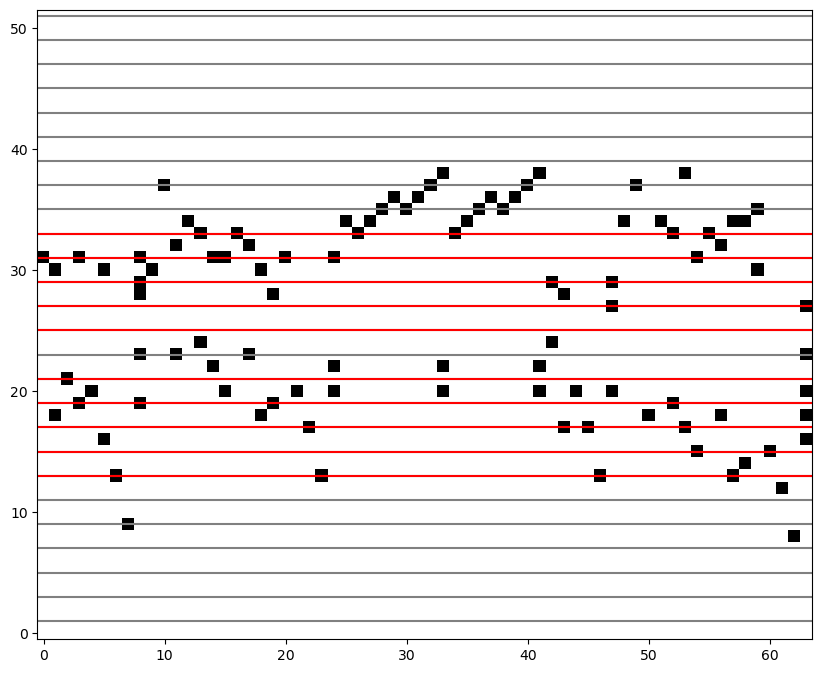

In [5]:
visualize_bootleg_score(merge_staff_overlaps(x_train[0]).T, lines=[13, 15, 17, 19, 21, 25, 27, 29, 31, 33])

In [6]:
block_sizes = [
    [1, 1],
    [1, 2],
    [1, 4],
    [1, 8],
]

print("SPARSE")
print()

for enc_name in encoders.sparse_encoders.keys():
    with open(f"/home/abunn/ttmp/ExplorationWithLLMs/source/03_alec_temp_name/finetuning_data/{enc_name}.pkl", "rb") as f:
        x_train_encoded, y_train_encoded, x_valid_encoded, y_valid_encoded, x_test_encoded, y_test_encoded = pickle.load(f)
    print("Encoder:", enc_name)
    print()
    print((x_train_encoded[0], y_train_encoded[0]))
    print()

print("DENSE")
print()

for block_size in block_sizes:
    with open(f"/home/abunn/ttmp/ExplorationWithLLMs/source/03_alec_temp_name/finetuning_data/dense_{block_size[0]}_{block_size[1]}.pkl", "rb") as f:
        x_train_encoded, y_train_encoded, x_valid_encoded, y_valid_encoded, x_test_encoded, y_test_encoded = pickle.load(f)
    print("Block size:", block_size)
    print()
    print((x_train_encoded[0], y_train_encoded[0]))
    print()

SPARSE

Encoder: char_encoder

('f | Se | V | Tf | U | Qe | N | J | TXcdf | e | l | Xg | i | Yh | Wf | Uf | h | Xg | Se | Tc | f | U | R | N | UWf | i | h | i | j | k | j | k | l | UWm | h | i | j | k | j | k | l | UWm | Yd | Rc | U | R | N | Ubd | i | l | S | i | Th | Rm | Pf | h | Sg | Ni | Oi | ej | P | M | I | QSUXb', 3)

Encoder: chroma_octave_encoder

('D5 | E3-C5 | A4 | F3-D5 | G3 | C3-C5 | G2 | C2 | F3-C4-A5-B5-D5 | C5 | C6 | C4-E5 | G5 | D4-F5 | B4-D5 | G3-D5 | F5 | C4-E5 | E3-C5 | F3-A5 | D5 | G3 | D3 | G2 | G3-B4-D5 | G5 | F5 | G5 | A6 | B6 | A6 | B6 | C6 | G3-B4-D6 | F5 | G5 | A6 | B6 | A6 | B6 | C6 | G3-B4-D6 | D4-B5 | D3-A5 | G3 | D3 | G2 | G3-G4-B5 | G5 | C6 | E3 | G5 | F3-F5 | D3-D6 | B3-D5 | F5 | E3-E5 | G2-G5 | A3-G5 | C5-A6 | B3 | F2 | B2 | C3-E3-G3-C4-G4', 3)

Encoder: interval_encoder

('D5 | E3-12 | A4 | F3-12 | G3 | C3-14 | G2 | C2 | F3-4-9-10-12 | C5 | C6 | C4-9 | G5 | D4-9 | B4-9 | G3-11 | F5 | C4-9 | E3-12 | F3-9 | D5 | G3 | D3 | G2 | G3-2-11 | G5 | F5 | G5 | 